In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Fibovin/des_modelos_1/refs/heads/main/Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Figure size 1000x600 with 0 Axes>

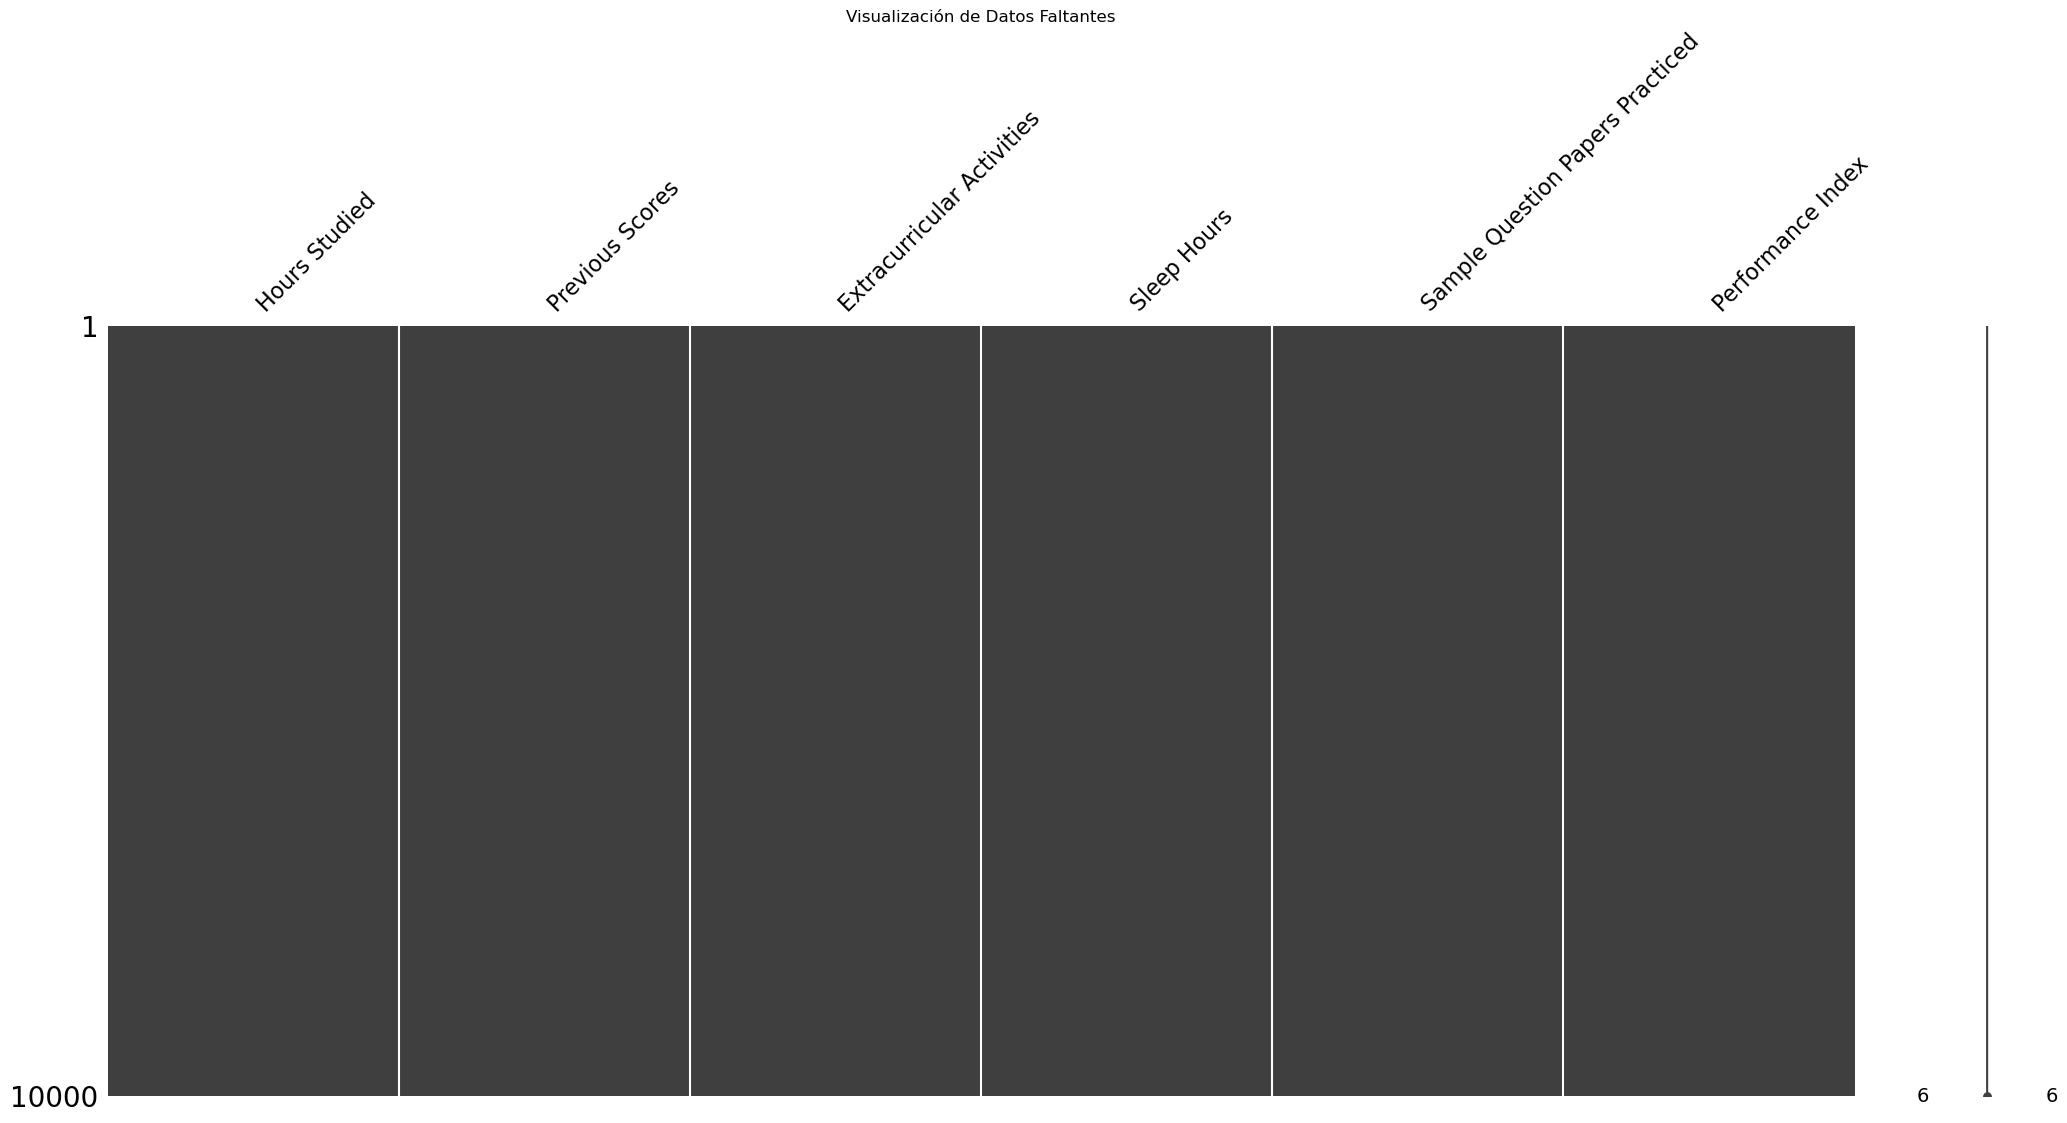

In [3]:
plt.figure(figsize=(10, 6)) #Datos faltantes
msno.matrix(df)
plt.title('Visualización de Datos Faltantes')
plt.show()

### **Medidas de tendencia central**

In [4]:
descriptivo = df.describe().T  #análisis de tendencia central de los datos
descriptivo1 = tabulate(descriptivo, headers='keys', tablefmt='pretty', floatfmt=".2f")
print(descriptivo1)


+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|                                  |  count  |  mean   |        std         | min  | 25%  | 50%  | 75%  |  max  |
+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|          Hours Studied           | 10000.0 | 4.9929  | 2.5893087961856156 | 1.0  | 3.0  | 5.0  | 7.0  |  9.0  |
|         Previous Scores          | 10000.0 | 69.4457 | 17.343152251047105 | 40.0 | 54.0 | 69.0 | 85.0 | 99.0  |
|           Sleep Hours            | 10000.0 | 6.5306  | 1.6958629765177113 | 4.0  | 5.0  | 7.0  | 8.0  |  9.0  |
| Sample Question Papers Practiced | 10000.0 | 4.5833  | 2.867347777708144  | 0.0  | 2.0  | 5.0  | 7.0  |  9.0  |
|        Performance Index         | 10000.0 | 55.2248 | 19.212557799463344 | 10.0 | 40.0 | 55.0 | 71.0 | 100.0 |
+----------------------------------+---------+---------+--------------------+------+----

### **Análisis de distribuciones**

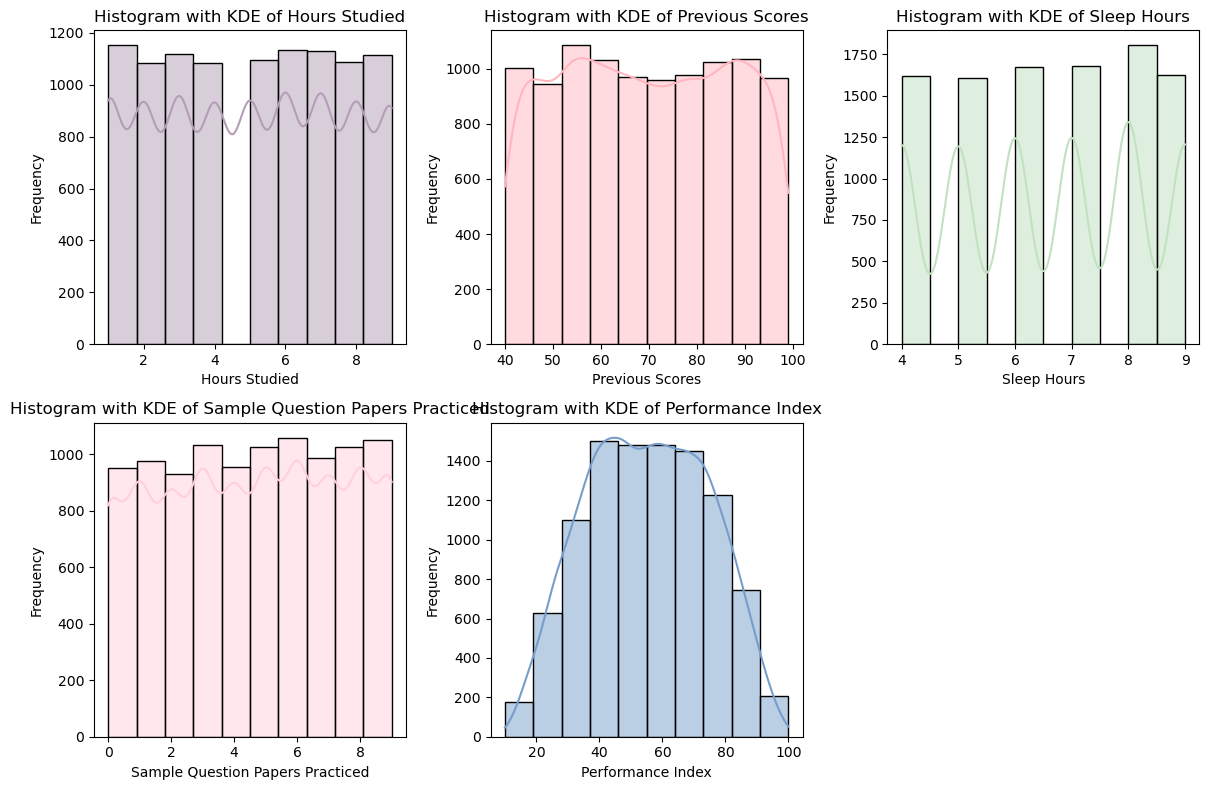

In [5]:
#Calculamos la densidad y y graficamos los histogramas
colores = ['#B39EB5', '#FFB6C1', '#C1E1C1', '#FFD1DC', '#779ECB']
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(df.select_dtypes(include='number').columns, colores), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=10, kde=True, color=color, edgecolor='black')
    plt.title(f'Histogram with KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()